In [1]:
# benjamin_wolcott@brown.edu, wolcottb
# HW 1

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal
%matplotlib inline  

Text(0.5, 1.0, 'Output Voltage from RK4 method')

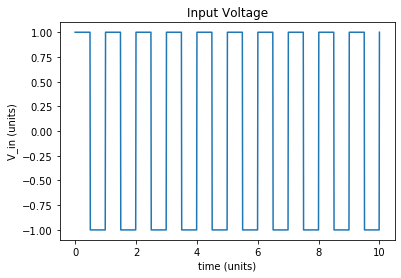

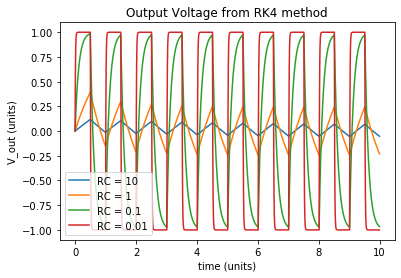

In [107]:
# Problem 1

# Using Kirchoff's current law we equate I_R, the current across the resistor = (V_out - V_in)/R and
# I_c, the current across the capacitor = -C(dV_out/dt), to get dV_out/dt = -(V_out - V_in)/RC

# Use RK4 integrator to solve for square wave input signal

def approx_rk4(dt, t_final, RC, V_in, V0, t0=0.0):
    
    # number of time steps, nust be an integer
    n  = int(t_final/dt) 
    
    #initialize some empty lists to store our data and time steps
    V_list = []
    t_list = []
    
    # the main loop over all time steps
    for ii in range(n):
        if ii == 0.0:
            # set initial conditions at time zero
            V = V0
            t = t0
        else :            
            k1 = -dt*(V - V_in(t))
            V1 = V + k1/2
            k2 = dt*g(RC, V_in(t), V1)
            V2 = V + k2/2
            k3 = dt*g(RC, V_in(t), V2)
            V3 = V + k3
            k4 = dt*g(RC, V_in(t), V3)
            
            # update value of V at each time step and step time by dt
            V+= (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            t+= dt 
            
        # use append to add on to the end of a list
        V_list.append(V)
        t_list.append(t)
    
    # we turn the lists into numpy arrays before returning
    
    V_list = np.array(V_list)
    t_list = np.array(t_list)
    
    return t_list, V_list

# Define g = dV_out/dt
def g(RC, V_in, V):
    g = -(1/(RC))*(V - V_in)
    return g

# Define our constants
V0, t0 = 0.0, 0.0
t_final, dt = 10, 0.01

# Define t and V_in
t = np.linspace(t0,t_final,1000) 

def V_in(t):
    V_in = sp.signal.square(t*2*np.pi)
    return V_in

# Plot the square wave input voltage
V_inplot = sp.signal.square(t*2*np.pi)
plt.plot(t, V_inplot)
plt.xlabel("time (units)")
plt.ylabel("V_in (units)")
plt.title('Input Voltage')

#Call our  approximate function for different RC values, this returns function values and time points 
t_approx10, V_approx10 = approx_rk4(dt, t_final, 10, V_in, V0)
t_approx1, V_approx1 = approx_rk4(dt, t_final, 1, V_in, V0)
t_approx01, V_approx01 = approx_rk4(dt, t_final, 0.1, V_in, V0)
t_approx001, V_approx001 = approx_rk4(dt, t_final, 0.01, V_in, V0)

# Generate rk4 plots 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_approx10, V_approx10, linestyle = '-', label = "RC = 10")
ax.plot(t_approx1, V_approx1, linestyle = '-', label = "RC = 1")
ax.plot(t_approx01, V_approx01, linestyle = '-', label = "RC = 0.1")
ax.plot(t_approx001, V_approx001, linestyle = '-', label = "RC = 0.01")
plt.legend()
plt.xlabel("time (units)")
plt.ylabel("V_out (units)")
plt.title('Output Voltage from RK4 method')

# For larger RC value, the system is able to react less quickly to the input voltage switching because more charge can be
# stored in the capacitor/less current flows through the resistor. When we decrease the RC value we see that the output
# voltage more quickly responds to changes in the input voltage. If we can alter the value of RC in the cirucit, we
# can control the output voltage for a given input signal: allow it to pass through mostly unchanged for small RC or
# attenuate and modulate it for large RC.

(10000,)
(10000,)
(10000,)
(10000,)
Cumulative error for N_a RK4: 19.990010350626704
Cumulative error for N_b RK4: 76.93633823570471


Text(0.5, 1.0, 'N_a and N_b over time')

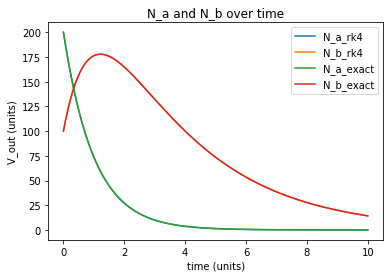

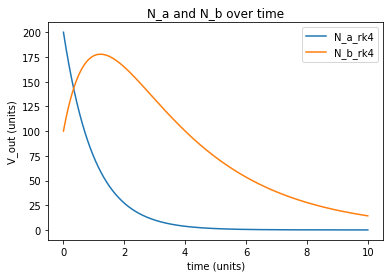

In [189]:
#Problem 2

# ODE Integrator Using RK4 Method
def approx_rk4(dt, t_final, N_a0, N_b0, T_a, T_b, t0=0.0):
    
    # number of time steps, nust be an integer
    npoints  = int(t_final/dt) 
    #initialize some empty lists to store our data and time steps
    N_list = np.array([])
    t_list = []
    
    # the main loop over all time steps
    for ii in range(npoints):
        if ii == 0:
            # set initial conditions at time zero
            N = np.array([[N_a0, N_b0]])
            t = t0
        else :            
            k1 = dt*g(N, T_a, T_b)
            N1 = N + k1/2
            k2 = dt*g(N1, T_a, T_b)
            N2 = N + k2/2
            k3 = dt*g(N2, T_a, T_b)
            N3 = N + k3
            k4 = dt*g(N3, T_a, T_b)
            
            # update value of N at each time step and step time by dt
            N = N + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
            t+= dt
            
        # use append to add on to the end of a list
        N_list = np.append(N_list, N)
        t_list.append(t)
    
    # we turn the lists into numpy arrays before returning
    
    t_list = np.array(t_list)
    
    return t_list, N_list

# Define coupled equations
def g(N, T_a, T_b):
    g = np.array([-N[0]/T_a, (N[0]/T_a) - (N[1]/T_b)])
    return g

# Define constants and initial conditions
N_a0, N_b0 = 200, 100
T_a, T_b = 1, 3
t0 = 0
t_final, dt = 10, 0.001

def exact(t, N_a0, N_b0, T_a, T_b, t0=0.0):
    a = T_a
    b = T_b
    N_a = N_a0*np.exp(-t/a)
    N_b = ((N_a0*b)/(a - b))*np.exp(-(t*(a+b))/(a*b))*(np.exp(t/b) - np.exp(t/a)) + N_b0*np.exp(-t/b)
    return N_a, N_b

t_list, N_list = approx_rk4(dt, t_final, N_a0, N_b0, T_a, T_b)

t_exact = np.linspace(t0,t_final,t_final/dt) 

N_a_exact, N_b_exact = exact(t_exact, N_a0, N_b0, T_a, T_b)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_list, N_list[::2], linestyle = '-', label = "N_a_rk4")
ax.plot(t_list, N_list[1::2], linestyle = '-', label = "N_b_rk4")
ax.plot(t_exact, N_a_exact, linestyle = '-', label = "N_a_exact")
ax.plot(t_exact, N_b_exact, linestyle = '-', label = "N_b_exact")
plt.legend()
plt.xlabel("time (units)")
plt.ylabel("V_out (units)")
plt.title('N_a and N_b over time')

def cumulative_error(approx, exact):
#     print(approx - exact)
    print(np.shape(approx))
    print(np.shape(exact))
    error = abs(approx - exact)
    cum = np.sum(error)
    return(cum)

error_a = cumulative_error(N_list[::2], N_a_exact)
error_b = cumulative_error(N_list[1::2], N_b_exact)
print("Cumulative error for N_a RK4:", error_a)
print("Cumulative error for N_b RK4:", error_b)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_list, N_list[::2], linestyle = '-', label = "N_a_rk4")
ax.plot(t_list, N_list[1::2], linestyle = '-', label = "N_b_rk4")
plt.legend()
plt.xlabel("time (units)")
plt.ylabel("V_out (units)")
plt.title('N_a and N_b over time')


Cumulative error for N_a RK4: 19.990010350626704
Cumulative error for N_b RK4: 76.93633823570471


NameError: name 'N' is not defined

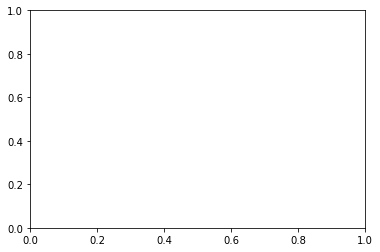

In [116]:
# Generate plots 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_list, N[0], linestyle = '-', label = "N_a")

# plot approximate solution (use discrete points with no connecting line)
ax.plot()

plt.legend()
plt.xlabel("time (units)")
plt.ylabel("Capacitor charge (units)")

In [40]:
N_a0, N_b0 = 100, 100
N = np.array([N_a0, N_b0])
N*.1

array([10., 10.])

In [43]:
N_list = []
N_list = np.array(N_list)
N_list = np.append(N_list, [0, 0])
N_list

array([0., 0.])

Text(0, 0.5, 'V_in (units)')

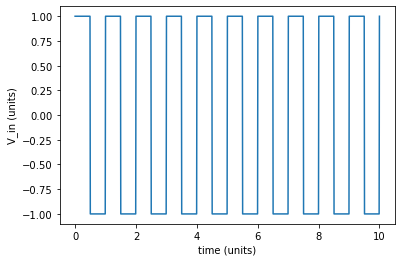

In [83]:
t = np.linspace(t0,t_final,1000) 
V_in = sp.signal.square(t*2*np.pi)

plt.plot(t, V_in)
plt.xlabel("time (units)")
plt.ylabel("V_in (units)")
